In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

##**Dataset**
Use the MNIST fashion dataset consisting of 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist #load the dataset
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()#split into testing and training

In [ ]:
train_images.shape

(60000, 28, 28)

We have got 60,000 images that are made up of 28x28 pixels (784) in total.

In [ ]:
train_images[0,23,23]##Let's have a look at one pixel

194

In [ ]:
type(train_images)#Check the data type of images

numpy.ndarray

Our pixel images are between 0 and 255, 0 being black and 255 being white, this means they are no graysclae images as ther are no color channels

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.



In [ ]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's look at what some our images look like.

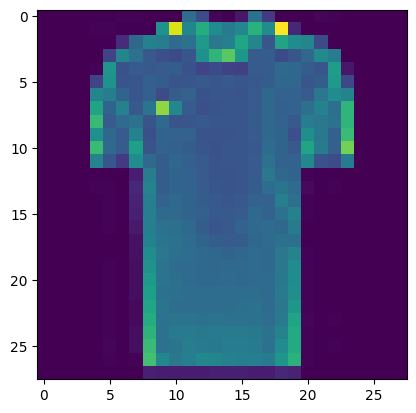

In [ ]:
plt.figure()
plt.imshow(train_images[522])
plt.colorbar()
plt.grid(False)
plt.show()

##**Data Preprocessing**
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data befor feeding it in to the model. In this case we will simply scale all our grayscale pixel values (0-255) to between 0-1. We can do this by dividing each value by in the training and testing tests by 255. We do this because smaller values will amke it easier for the model to process our values.


In [ ]:
train_images = train_images/255
test_images = test_images/255

##**Building the Model**
We use keras sequential model with 3 different layers. This model represent a feed-forward neural network(one that passes values from left and right)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # input layer(1)
    keras.layers.Dense(128, activation = 'relu'),# hidden layer (2)
    keras.layers.Dense(10, activation = 'softmax')# output layer (3)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Layer1**: This is our input layer and it will consist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in that shape. The flatten means that our layer will reshape the shape (28,28) array in to a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3**: This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron reperesents the probability of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate the probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represent a high probabilty of teh image being that class.

* Sequential refers to the most basic
form of neural networks, which is information going from the left side to the right side.
* Flatten allows us to take a shape of 28 by 28 which we have defined and flatten all the pixels in to 784 pixels, take the 28 by 28 matrix like structure and flatten it.
* Dense means that all of the neurons in the previous layer are connected to the neurons in the current layer.
* The output layer is a dense layer made up of 10 output neurons with the activation of softmax. We have 10 classes, hence we have 10 output neurons.
* Softmax will ensure that all values of our neuron add up to 1 and are between 0 and 1.

##**Compile the Model**

The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

We use the **adams optimizer**, which perfroms the gradient descent.

In [ ]:
##Conduct hyperparameter tunuing on the following parameters together with the number of neurons mentioned earlier.
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

##**training the Model**

In [ ]:
model.fit(train_images, train_labels, epochs  =8)#Pass the data, labels and epochs

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9361 - loss: 0.1705
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9386 - loss: 0.1640
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9401 - loss: 0.1606
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9388 - loss: 0.1618
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9433 - loss: 0.1521
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9424 - loss: 0.1536
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9450 - loss: 0.1451
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9470 - loss: 0.1423


Reducing the epoch from 10 to 8 actually makes the model much better.

##**Evaluating the model**
The verbose argument is definedfrom the keras documentation as: "verbose 0 or 1. verbosity mode. 0 =silent, 1=progress bat"

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8913 - loss: 0.3970
test accuracy: 0.8925999999046326


##**Making Predictions**
To make predictions, we simply need to pass an array of data in the form we've specified in the input layer to `.predict`.
The model is good at predicting an array of images at once than just one specific item

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#predictions1  =model.predict([test_images[0]])#predict on one image

In [ ]:
predictions  =model.predict(test_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.5536414e-14, 8.3456992e-16, 2.8051601e-15, ..., 2.7182861e-04,
        1.1064487e-14, 9.9971855e-01],
       [2.9638337e-04, 1.6562435e-18, 9.9955267e-01, ..., 6.5263760e-18,
        1.6728377e-15, 2.0171656e-15],
       [5.2818721e-21, 9.9999994e-01, 1.5189937e-24, ..., 0.0000000e+00,
        2.2301872e-23, 1.6677379e-35],
       ...,
       [6.3271312e-11, 1.1479875e-22, 1.1145995e-09, ..., 3.4370271e-13,
        9.9999827e-01, 1.1862516e-28],
       [4.2683062e-16, 9.9999994e-01, 8.1200458e-18, ..., 1.2317084e-27,
        4.3300490e-17, 1.7768104e-18],
       [1.4080186e-03, 4.6761073e-10, 2.3055898e-06, ..., 3.1622752e-04,
        7.7071127e-06, 3.1287033e-07]], dtype=float32)

This implies every single image has a list that represent the prediction for it

In [ ]:
##Prediction for test image zero
predictions[0]

array([2.5536414e-14, 8.3456992e-16, 2.8051601e-15, 1.5369059e-17,
       8.2678340e-18, 9.6882122e-06, 1.1921797e-20, 2.7182861e-04,
       1.1064487e-14, 9.9971855e-01], dtype=float32)

* This is the probability distribution
that was calculated on our output layer for that image.
* To figure out what class this is predicting for, we use argmax which returns index of the maximum value in the list.
* For this case it will return 9.997 which is the index for the highest value in the list.
* Use class_names to print out the exact class


In [ ]:
predictions  =model.predict(test_images)
np.argmax(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


9

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Trouser


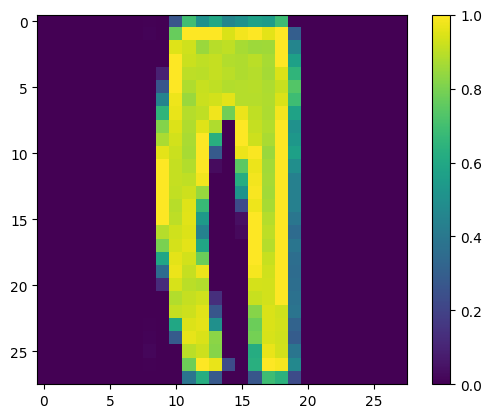

In [ ]:
predictions  =model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

##**Verifying predictions**

Pick a number: 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


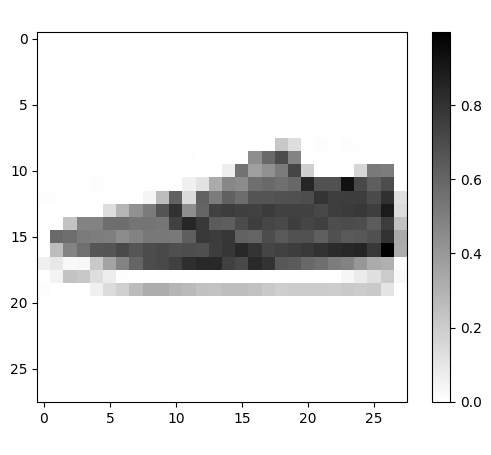

In [ ]:
COLOR = 'white'
plt.rcParams['text.color']= COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected:" + label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num  = int(num)
      if 0 <= num <= 1000:
        return int(num)
  else:
    print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
